In [3]:
import pickle
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import random
from unit import node_name2vec

In [4]:
with open('embedding_data/Metapath2vec_8212.pickle', 'rb') as f:
    Metapath2vec_8212 = pickle.load(f)

In [5]:
with open('embedding_data/Metapath2vec+NPMI+M2V.pickle', 'rb') as f:
    Metapath2vec_NPMI_M2V = pickle.load(f)

In [182]:
classification_data.columns

Index(['Bakery/Dessert/Snack', 'Beverage Alcoholic', 'Cereal/Crop/Bean',
       'Dairy', 'Fruit', 'Meat/Animal Product', 'Plant/Vegetable', 'Seafood'],
      dtype='object')

In [8]:
X = [random.choices([0,1])[0] for i in range(10)]

In [16]:
X = []
for j in range(100):
    X.append([random.choices([0,1])[0] for i in range(881)])

In [6]:
colors =  ["r", "g", "c", "m", "y", "k", "orange","pink"]
def plot_tSNE(file,n,p):
    cd = pd.read_csv("classification_data/node_classification_hub.csv")
    classification_data = pd.read_csv("classification_data/node_classification_160.csv")
    categories = cd.columns
    trg_df = pd.DataFrame()
    for category in categories:
        add_df = classification_data[classification_data["category"] == category].sample(n, random_state=0)
        trg_df = pd.concat([trg_df,add_df])
    tsne = TSNE(n_components=2, random_state = 0, perplexity = p, n_iter = 1000)
    vec_ls = [node_name2vec(name,file) for name in trg_df["ingredient"]]
    embed_vec = tsne.fit_transform(vec_ls)
    trg_df["embed_1"] = embed_vec.T[0]
    trg_df["embed_2"] = embed_vec.T[1]
    plt.figure(figsize=(8,6))
    colors =  ["r", "g", "c", "m", "y", "k", "orange","pink"]
    for i , cat in enumerate(categories):
        tmp_df = trg_df[trg_df["category"] == cat]
        plt.scatter(tmp_df["embed_1"], tmp_df["embed_2"],label = cat,color = colors[i])
    plt.legend(fontsize = 8)
    
    # 
    # for col in classification_data.columns:
    #     X = [node_name2vec(name,file) for name in trg_data[col]]
    #     X_embedded = tsne.fit_transform(X)
        
    

/Users/naokiyoshimaru/opt/anaconda3/envs/FlavorGraph_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/naokiyoshimaru/opt/anaconda3/envs/FlavorGraph_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/naokiyoshimaru/opt/anaconda3/envs/FlavorGraph_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/naokiyoshimaru/opt/anaconda3/envs/FlavorGraph_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/naokiyoshimaru/opt/anaconda3/envs/FlavorGraph_env/lib/python3.8/site-packages/sklearn/manif

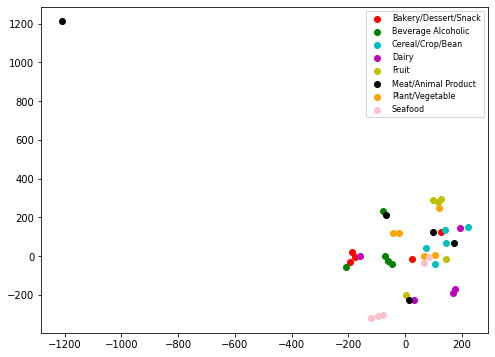

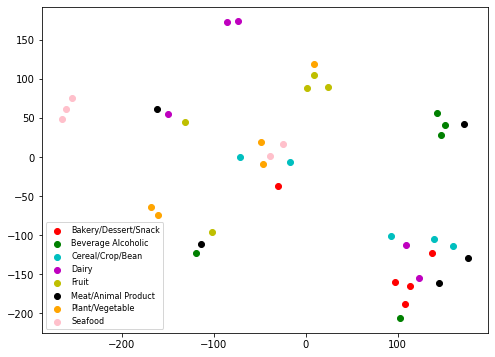

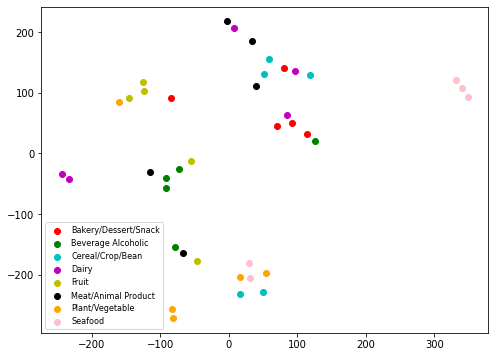

In [7]:
n=5
p=2.375
plot_tSNE('embedding_data/Metapath2vec_8212.pickle',n,p)
plot_tSNE('embedding_data/Metapath2vec+CSP_8212.pickle',n,p)
plot_tSNE('embedding_data/Metapath2vec+NPMI+M2V.pickle',n,p)